In [39]:
import numpy as np
from hmmlearn import hmm
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
A_internal = [[0.15, 0.05, 0.0, 0.8, 0.0, 0.0], [0.5, 0.25, 0.1, 0.0, 0.15, 0.0], [0.25, 0.0, 0.5, 0.125, 0.0, 0.125]]
T_internal = np.array(A_internal)
T_internal
# the first 3 columns refer to internal transitions, the last 3 columns refer to external transition to other components

array([[0.15 , 0.05 , 0.   , 0.8  , 0.   , 0.   ],
       [0.5  , 0.25 , 0.1  , 0.   , 0.15 , 0.   ],
       [0.25 , 0.   , 0.5  , 0.125, 0.   , 0.125]])

In [3]:
# probabilities external transitions, ie if there is an external transition, where does the transition lead?
A_external = [[0.0 for col in range(19)] for row in range(19)]
A_external[0][12] = 1

A_external[1][14] = 1

A_external[2][0] = .25
A_external[2][7] = .25
A_external[2][11] = .25
A_external[2][12] = .25

A_external[3][1] = 1

A_external[4][13] = 1

A_external[5][4] = 1

A_external[6][18] = 1

A_external[7][11] = .5
A_external[7][12] = .5

A_external[8][0] = .33
A_external[8][11] = .34
A_external[8][12] = .33

A_external[9][10] = 1

A_external[10][3] = 1

A_external[11][18] = 1

A_external[12][9] = 1

A_external[13][6] = 1

A_external[14][16] = 1

A_external[15][0] = .33
A_external[15][11] = .34
A_external[15][12] = .33

A_external[16][5] = 1

A_external[17][0] = .33
A_external[17][11] = .34
A_external[17][12] = .33

A_external[18][0] = .17
A_external[18][2] = .17
A_external[18][7] = .17
A_external[18][8] = .17
A_external[18][15] = .16
A_external[18][17] = .16

T_external = np.array(A_external)
T_external

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  ,
        0.25, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0

In [4]:
A_complete = [[0.0 for col in range(19 * 3)] for row in range(19 * 3)]
for x in range(19):
    for s in range(3):
        xs = x * 3 + s
        # internal transitions
        A_complete[xs][x * 3] = A_internal[s][0]
        A_complete[xs][x * 3 + 1] = A_internal[s][1]
        A_complete[xs][x * 3 + 2] = A_internal[s][2]
        for y in range(19):
            if y != x:
                # external transitions
                A_complete[xs][y * 3] = A_internal[s][3] * A_external[x][y]
                A_complete[xs][y * 3 + 1] = A_internal[s][4] * A_external[x][y]
                A_complete[xs][y * 3 + 2] = A_internal[s][5] * A_external[x][y]
T_complete = np.array(A_complete)
T_complete

array([[0.15   , 0.05   , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.5    , 0.25   , 0.1    , ..., 0.     , 0.     , 0.     ],
       [0.25   , 0.     , 0.5    , ..., 0.     , 0.     , 0.     ],
       ...,
       [0.136  , 0.     , 0.     , ..., 0.15   , 0.05   , 0.     ],
       [0.     , 0.0255 , 0.     , ..., 0.5    , 0.25   , 0.1    ],
       [0.02125, 0.     , 0.02125, ..., 0.25   , 0.     , 0.5    ]])

In [5]:
model = hmm.GaussianHMM(n_components=19 * 3, covariance_type="spherical")
model

GaussianHMM(covariance_type='spherical', n_components=57)

In [6]:
startprob = [0.0] * (19 * 3)
startprob[0] = 1.0
model.startprob_ = np.array(startprob)
model.transmat_ = T_complete
model.features = 19 * 3

In [7]:
O_internal = np.array([[0.85, 0.15, 0.0, 0.0, 0.0, 0.0], [0.1, 0.6, 0.2, 0.0, 0.1, 0.0], [0.05, 0.0, 0.7, 0.1, 0.0, 0.15]])
O_internal

array([[0.85, 0.15, 0.  , 0.  , 0.  , 0.  ],
       [0.1 , 0.6 , 0.2 , 0.  , 0.1 , 0.  ],
       [0.05, 0.  , 0.7 , 0.1 , 0.  , 0.15]])

In [8]:
O_complete = [[0.0 for col in range(19 * 3)] for row in range(19 * 3)]
for x in range(19):
    for s in range(3):
        xs = x * 3 + s
        # internal transitions
        O_complete[xs][x * 3] = O_internal[s][0]
        O_complete[xs][x * 3 + 1] = O_internal[s][1]
        O_complete[xs][x * 3 + 2] = O_internal[s][2]
        for y in range(19):
            if y != x:
                # external transitions
                O_complete[xs][y * 3] = O_internal[s][3] * A_external[x][y]
                O_complete[xs][y * 3 + 1] = O_internal[s][4] * A_external[x][y]
                O_complete[xs][y * 3 + 2] = O_internal[s][5] * A_external[x][y]
O_complete = np.array(O_complete)
O_complete

array([[0.85  , 0.15  , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.1   , 0.6   , 0.2   , ..., 0.    , 0.    , 0.    ],
       [0.05  , 0.    , 0.7   , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.85  , 0.15  , 0.    ],
       [0.    , 0.017 , 0.    , ..., 0.1   , 0.6   , 0.2   ],
       [0.017 , 0.    , 0.0255, ..., 0.05  , 0.    , 0.7   ]])

In [9]:
model.means_ = O_complete
covar = 0.1 ** 323
model.covars_ = np.tile([covar], 3 * 19)

In [10]:
X, Z = model.sample(10000)
X = np.round(X, 8)
X

array([[ 0.85,  0.15,  0.  , ..., -0.  ,  0.  , -0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  , -0.  , -0.  ],
       [-0.  , -0.  , -0.  , ...,  0.  ,  0.  , -0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ..., -0.  , -0.  ,  0.  ],
       [-0.  , -0.  , -0.  , ...,  0.  ,  0.  , -0.  ],
       [ 0.  ,  0.  , -0.  , ..., -0.  , -0.  , -0.  ]])

In [11]:
def discrete_trace(trace):
    new_trace = []
    for i in range(len(trace)):
        new_trace.append([])
        probs = trace[i]
        chosen = np.random.choice(len(probs), 1, p=probs)[0]
        for j in range(len(probs)):
            new_trace[i].append(1 if j == chosen else 0)
    return new_trace

In [12]:
def get_transformation(means):
    transformation = [-1] * len(means)
    for i in range(len(means)):
        max_value = 0
        max_index = -1
        mean = means[i]
        for j in range(len(mean)):
            if mean[j] > max_value:
                max_value = mean[j]
                max_index = j
        transformation[i] = max_index
    return transformation

In [13]:
def transform(matrix, transformation):
    new_matrix = [[-1 for col in range(len(matrix))] for row in range(len(matrix))]
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            new_matrix[transformation[i]][transformation[j]] = matrix[i][j]
    return new_matrix

In [14]:
def transition_matrix(trace, iterations):
    remodel = hmm.GaussianHMM(n_components = 19 * 3, covariance_type='full', n_iter = iterations)
    remodel.fit(trace)
    transform_remodel = get_transformation(remodel.means_)
    return transform(remodel.transmat_, transform_remodel)

In [15]:
X_discrete = discrete_trace(X)

In [16]:
np.array(transition_matrix(X_discrete, 1000))

array([[0.12982456, 0.04210526, 0.01052632, ..., 0.        , 0.        ,
        0.        ],
       [0.2027027 , 0.16216216, 0.02702703, ..., 0.04054054, 0.        ,
        0.        ],
       [0.45454546, 0.27272726, 0.        , ..., 0.09090909, 0.        ,
        0.        ],
       ...,
       [0.12244898, 0.0127551 , 0.        , ..., 0.13647959, 0.05739796,
        0.01147959],
       [0.0989011 , 0.02197802, 0.        , ..., 0.18131868, 0.0989011 ,
        0.03296703],
       [0.        , 0.        , 0.        , ..., 0.44827586, 0.06896551,
        0.20689654]])

In [17]:
def plot_probs(trace, length):
    x = np.arange(0, length, 1)
    probs = [[[-1 for dep in x] for col in range(19 * 3)] for row in range(19 * 3)]
    for i in x:
        trans = transition_matrix(trace, i)
        for j in range(len(trans)):
            for k in range(len(trans[j])):
                probs[j][k][i] = trans[j][k]
    for j in range(len(probs)):
        for k in range(len(probs[j])):
            y = probs[j][k]
            plt.plot(x, y, label=str(j) + " -> " + str(k))
    # plt.legend(loc='right', shadow=True, fontsize='x-large')

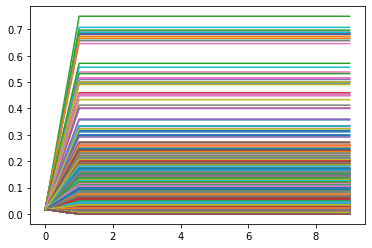

In [18]:
plot_probs(X_discrete, 10)

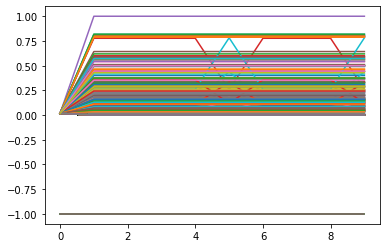

In [19]:
plot_probs(X, 10)

In [37]:
trans = transition_matrix(X_discrete, 5)

In [38]:
# create mapping of the names to the states
components = ['Authentication Services', 'Availability Item Filter', 'Bid and Buy Service', 'Buy Now Item Filter', 'Category Item Filter', 'Comment Item Filter', 'Future Sales Item Filter', 'Inventory Service', 'Item Management Service', 'Last Second Sales Item Filter', 'Past Sales Item Filter', 'Persistence Service', 'Query Service', 'Recommendation Item Filter', 'Region Item Filter', 'Reputation Service', 'Seller Reputation Item Filter', 'User Management Service', 'Supervisory Component']
component_states = ['operational', 'degraded', 'unresponsive']
names = [''] * (19 * 3)
for c in range(19):
    for s in range(3):
        names[3 * c + s] = components[c] + ' ' + component_states[s]

In [42]:
df = pd.DataFrame(trans, index=names, columns=names)
df

,Authentication Services operational,Authentication Services degraded,Authentication Services unresponsive,Availability Item Filter operational,Availability Item Filter degraded,Availability Item Filter unresponsive,Bid and Buy Service operational,Bid and Buy Service degraded,Bid and Buy Service unresponsive,Buy Now Item Filter operational,...,Reputation Service unresponsive,Seller Reputation Item Filter operational,Seller Reputation Item Filter degraded,Seller Reputation Item Filter unresponsive,User Management Service operational,User Management Service degraded,User Management Service unresponsive,Supervisory Component operational,Supervisory Component degraded,Supervisory Component unresponsive
Authentication Services operational,0.129825,0.042105,0.010526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Authentication Services degraded,0.202703,0.162162,0.027027,0.000000,0.000000,0.000000,0.000000,0.013514,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.027027,0.000000,0.000000,0.040541,0.000000,0.000000
Authentication Services unresponsive,0.454545,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000
Availability Item Filter operational,0.000000,0.000000,0.000000,0.150190,0.049430,0.017110,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Availability Item Filter degraded,0.000000,0.000000,0.000000,0.209790,0.111888,0.048951,0.000000,0.000000,0.000000,0.006993,...,0.000000,0.000000,0.006993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Availability Item Filter unresponsive,0.000000,0.000000,0.000000,0.296296,0.074074,0.296296,0.000000,0.000000,0.000000,0.037037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bid and Buy Service operational,0.144068,0.033898,0.000000,0.000000,0.000000,0.000000,0.118644,0.076271,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bid and Buy Service degraded,0.075000,0.050000,0.000000,0.000000,0.000000,0.000000,0.150000,0.175000,0.050000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000
Bid and Buy Service unresponsive,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Buy Now Item Filter operational,0.000000,0.000000,0.000000,0.646182,0.152700,0.000000,0.000000,0.000000,0.000000,0.150838,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [49]:
df.to_csv('transition.csv', index_label="Sources")